In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split

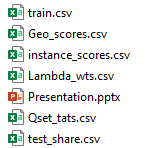

In [2]:
geo = pd.read_csv('Geo_scores.csv')
instance = pd.read_csv('instance_scores.csv')
lmbda = pd.read_csv('Lambda_wts.csv')
qset = pd.read_csv('Qset_tats.csv')
test = pd.read_csv('test_share.csv')
train = pd.read_csv('train.csv')

In [3]:
print(geo.shape)
print('********************')
print(instance.shape)
print('********************')
print(lmbda.shape)
print('********************')
print(qset.shape)
print('********************')
print(test.shape)
print('********************')
print(train.shape)
print('********************')

(1424035, 2)
********************
(1424035, 2)
********************
(1400, 2)
********************
(1424035, 2)
********************
(56962, 27)
********************
(227845, 28)
********************


In [4]:
print(geo.info())
print('********************')
print(instance.info())
print('********************')
print(lmbda.info())
print('********************')
print(qset.info())
print('********************')
print(test.info())
print('********************')
print(train.info())
print('********************')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1424035 non-null  int64  
 1   instance_scores  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Group      1400 non-null   object 
 1   lambda_wt  1400 non-null   floa

In [5]:
print(geo.isnull().sum())
print('********************')
print(instance.isnull().sum())
print('********************')
print(lmbda.isnull().sum())
print('********************')
print(qset.isnull().sum())
print('********************')
print(test.isnull().sum())
print('********************')
print(train.isnull().sum())
print('********************')

id               0
geo_score    71543
dtype: int64
********************
id                 0
instance_scores    0
dtype: int64
********************
Group        0
lambda_wt    0
dtype: int64
********************
id                           0
qsets_normalized_tat    103201
dtype: int64
********************
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
dtype: int64
********************
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              

In [6]:
print(geo.head(2))
print('********************')
print(instance.head(2))
print('********************')
print(lmbda.head(2))
print('********************')
print(qset.head(2))
print('********************')
print(test.head(2))
print('********************')
print(train.head(2))
print('********************')

       id  geo_score
0   26674       4.48
1  204314       4.48
********************
       id  instance_scores
0  173444            -0.88
1  259378             1.50
********************
    Group  lambda_wt
0  Grp936       3.41
1  Grp347      -2.88
********************
       id  qsets_normalized_tat
0    9983                  2.41
1  266000                  3.10
********************
       id   Group      Per1      Per2  Per3      Per4  Per5      Per6  Per7  \
0  146574  Grp229 -0.300000  1.540000  0.22 -0.280000  0.57  0.260000  0.70   
1  268759  Grp141  0.633333  0.953333  0.81  0.466667  0.91  0.253333  1.04   

       Per8  ...      Dem7      Dem8      Dem9     Cred1     Cred2     Cred3  \
0  1.076667  ...  0.786667  0.546667  0.313333  0.703333  0.813333  0.776667   
1  0.550000  ...  0.636667  0.770000  0.993333  0.536667  0.703333  0.806667   

      Cred4     Cred5     Cred6  Normalised_FNT  
0  0.796667  0.823333  0.783333       -249.7500  
1  0.630000  0.673333  0.673333   

In [7]:
# test 56962
#******************
# train 227845

In [8]:
print(geo.isnull().sum()/len(geo)*100)
print('*****************************')
print(qset.isnull().sum()/len(qset)*100)

id           0.000000
geo_score    5.023964
dtype: float64
*****************************
id                      0.000000
qsets_normalized_tat    7.247083
dtype: float64


In [9]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


In [10]:
sns.boxplot(y='geo_score', data=geo)

<Axes: ylabel='geo_score'>

In [11]:
qset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1424035 non-null  int64  
 1   qsets_normalized_tat  1320834 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


In [12]:
sns.boxplot(y='qsets_normalized_tat', data=qset)

<Axes: ylabel='geo_score'>

In [13]:
geo['geo_score'] = geo['geo_score'].fillna(geo['geo_score'].median())
qset['qsets_normalized_tat'] = qset['qsets_normalized_tat'].fillna(qset['qsets_normalized_tat'].median())

In [14]:
print(geo.isnull().sum()/len(geo)*100)
print('******************************')
print(qset.isnull().sum()/len(qset)*100)

id           0.0
geo_score    0.0
dtype: float64
******************************
id                      0.0
qsets_normalized_tat    0.0
dtype: float64


In [15]:
geo.describe()

,id,geo_score
count,1.424035e+06,1.424035e+06
mean,1.424030e+05,9.034321e-03
std,8.221673e+04,7.628149e+00
min,0.000000e+00,-1.093900e+02
25%,7.120100e+04,-5.170000e+00
50%,1.424030e+05,1.800000e-01
75%,2.136050e+05,5.170000e+00
max,2.848060e+05,4.581000e+01


In [16]:
test.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.57,0.260000,0.70,1.076667,...,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.91,0.253333,1.04,0.550000,...,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125


In [17]:
train.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.680000,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.716667,0.743333,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0


In [18]:
train['Target'].value_counts()

Target
0    227451
1       394
Name: count, dtype: int64

In [19]:
train['data'] = 'train'
test['data'] = 'test'

In [20]:
train.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.743333,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0,train


In [21]:
test.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.57,0.260000,0.70,1.076667,...,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.91,0.253333,1.04,0.550000,...,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test


In [22]:
# add both the table together
all_data = pd.concat([train, test], axis=0)

In [23]:
all_data.shape

(284807, 29)

In [24]:
print('***************** Unique Id to the customer *****************')
print('geo', geo['id'].nunique())
print('*****************')
print('instance', instance['id'].nunique())
print('*****************')
print('qset', qset['id'].nunique())
print('*****************')
print('all_data', all_data['id'].nunique())
print('*****************')
print()
print('***************** Unique Group to the customer *****************')
print()
print('*****************')
print('lmbda', lmbda['Group'].nunique())
print('*****************')
print('geo', test['Group'].nunique())
print('*****************')
print('geo', all_data['Group'].nunique())
print('*****************')

***************** Unique Id to the customer *****************
geo 284807
*****************
instance 284807
*****************
qset 284807
*****************
all_data 284807
*****************

***************** Unique Group to the customer *****************

*****************
lmbda 1400
*****************
geo 915
*****************
geo 1400
*****************


In [25]:
instance.shape

(1424035, 2)

In [26]:
qset.describe()

,id,qsets_normalized_tat
count,1.424035e+06,1.424035e+06
mean,1.424030e+05,1.459564e-03
std,8.221673e+04,7.446362e+00
min,0.000000e+00,-1.404400e+02
25%,7.120100e+04,-5.170000e+00
50%,1.424030e+05,2.000000e-02
75%,2.136050e+05,5.170000e+00
max,2.848060e+05,6.110000e+01


In [27]:
geo = geo.groupby('id').mean()
instance = instance.groupby('id').mean()
qset = qset.groupby('id').mean()

In [28]:
geo.shape

(284807, 1)

In [29]:
instance.shape

(284807, 1)

In [30]:
qset.shape

(284807, 1)

In [31]:
all_data.shape

(284807, 29)

In [32]:
lmbda.shape

(1400, 2)

In [33]:
lmbda.head(2)

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88


In [34]:
all_data = pd.merge(all_data, lmbda, on='Group', how='left')

In [35]:
all_data.shape

(284807, 30)

In [36]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.72
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.60


In [37]:
all_data = pd.merge(all_data, geo, on='id', how='left')

In [38]:
all_data.shape

(284807, 31)

In [39]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt,geo_score
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,-0.13,0.256
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,0.66,-0.250
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.51,-0.950
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.72,0.490
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.60,0.850


In [40]:
all_data.shape

(284807, 31)

In [41]:
qset.shape

(284807, 1)

In [42]:
all_data = pd.merge(all_data, qset, on='id', how='left')

In [43]:
all_data.shape

(284807, 32)

In [44]:
all_data['Group'].nunique()

1400

In [45]:
lmbda['Group'].nunique()

1400

In [46]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt,geo_score,qsets_normalized_tat
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,-0.13,0.256,-0.700
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,0.66,-0.250,0.140
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.51,-0.950,-0.430
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.72,0.490,-0.302
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.60,0.850,-0.630


In [47]:
train = all_data[all_data['data']=='train']
test = all_data[all_data['data']=='test']

In [48]:
train.shape

(227845, 32)

In [49]:
test.shape

(56962, 32)

In [50]:
test.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'lambda_wt', 'geo_score',
       'qsets_normalized_tat'],
      dtype='object')

In [51]:
train = train.drop(['id', 'data'], axis=1)
test = test.drop(['id', 'data'], axis=1)

In [52]:
test.isnull().sum()

Group                       0
Per1                        0
Per2                        0
Per3                        0
Per4                        0
Per5                        0
Per6                        0
Per7                        0
Per8                        0
Per9                        0
Dem1                        0
Dem2                        0
Dem3                        0
Dem4                        0
Dem5                        0
Dem6                        0
Dem7                        0
Dem8                        0
Dem9                        0
Cred1                       0
Cred2                       0
Cred3                       0
Cred4                       0
Cred5                       0
Cred6                       0
Normalised_FNT              0
Target                  56962
lambda_wt                   0
geo_score                   0
qsets_normalized_tat        0
dtype: int64

In [53]:
test = test.drop(['Target'], axis=1)
test.columns

Index(['Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8',
       'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8',
       'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'lambda_wt', 'geo_score', 'qsets_normalized_tat'],
      dtype='object')

In [54]:
unseen_test_data = test.copy()

In [55]:
unseen_test_data['Group'] = unseen_test_data['Group'].astype('category')

In [56]:
unseen_test_data['Group'] = unseen_test_data['Group'].cat.codes
unseen_test_data['Group']

227845    277
227846    180
227847    231
227848    485
227849    504
         ... 
284802     11
284803    569
284804    765
284805    163
284806    222
Name: Group, Length: 56962, dtype: int16

In [57]:
train.isnull().sum()

Group                   0
Per1                    0
Per2                    0
Per3                    0
Per4                    0
Per5                    0
Per6                    0
Per7                    0
Per8                    0
Per9                    0
Dem1                    0
Dem2                    0
Dem3                    0
Dem4                    0
Dem5                    0
Dem6                    0
Dem7                    0
Dem8                    0
Dem9                    0
Cred1                   0
Cred2                   0
Cred3                   0
Cred4                   0
Cred5                   0
Cred6                   0
Normalised_FNT          0
Target                  0
lambda_wt               0
geo_score               0
qsets_normalized_tat    0
dtype: int64

In [58]:
train['Group'] = train['Group'].astype('category')
train['Group'] = train['Group'].cat.codes

In [59]:
# split the data into ind and dep variable
X = train.drop(['Target'], axis=1)
y =train['Target']

In [60]:
y.value_counts(normalize=True)

Target
0.0    0.998271
1.0    0.001729
Name: proportion, dtype: float64

In [61]:
train['Target'].value_counts()

Target
0.0    227451
1.0       394
Name: count, dtype: int64

In [62]:
227451-394

227057

In [63]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [64]:
y_train.value_counts()

Target
0.0    181961
1.0       315
Name: count, dtype: int64

In [65]:
y_test.value_counts()

Target
0.0    45490
1.0       79
Name: count, dtype: int64

In [66]:
# Building Model
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
y_pred_train = rfmodel.predict(X_train)
y_pred_test = rfmodel.predict(X_test)

In [68]:
from sklearn.metrics import classification_report, accuracy_score

In [69]:
print(classification_report(y_train, y_pred_train))
print('*********************************')
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

*********************************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.95      0.68      0.79        79

    accuracy                           1.00     45569
   macro avg       0.97      0.84      0.90     45569
weighted avg       1.00      1.00      1.00     45569



In [70]:
print(accuracy_score(y_train, y_pred_train))
print('*********************************')
print(accuracy_score(y_test, y_pred_test))

1.0
*********************************
0.9993855471921701


In [71]:
final_output = rfmodel.predict(unseen_test_data)

In [72]:
final_output

array([0., 0., 0., ..., 0., 0., 0.])

In [73]:
final_output = pd.DataFrame(final_output)
final_output.columns

RangeIndex(start=0, stop=1, step=1)

In [74]:
unseen_test_data.shape

(56962, 29)

In [75]:
final_output = final_output.rename(columns={0:'isFraud'})

In [76]:
final_output.shape

(56962, 1)

In [77]:
final_output.to_csv('Final_Target_Value.csv')

In [78]:
final_output.value_counts()

isFraud
0.0        56880
1.0           82
Name: count, dtype: int64

In [79]:
final_output_prediction = pd.concat([unseen_test_data, final_output], axis=1)

In [80]:
final_output_prediction

,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,lambda_wt,geo_score,qsets_normalized_tat,isFraud
227845,277.0,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,0.930000,...,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.76,0.25,-0.426,NaN
227846,180.0,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,0.543333,...,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.18,0.43,-0.620,NaN
227847,231.0,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,0.593333,...,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,0.39,1.32,-0.406,NaN
227848,485.0,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,1.156667,...,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,1.80,-2.11,0.374,NaN
227849,504.0,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,1.476667,...,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,1.89,-2.11,-0.130,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
56958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
56959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
56960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [81]:
y_pred = rfmodel.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9993855471921701
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.95      0.68      0.79        79

    accuracy                           1.00     45569
   macro avg       0.97      0.84      0.90     45569
weighted avg       1.00      1.00      1.00     45569



In [82]:
sample = X_test.iloc[0:5] 
predictions = rfmodel.predict(sample)
print(predictions)

[0. 0. 0. 0. 0.]


In [83]:
import pickle
with open("fraud_model.pkl", "wb") as f:
    pickle.dump(final_output, f)